In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np 
import seaborn as sns 
from scipy.stats import zscore
from msresist.pca import plotPCA

In [2]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [62]:
def preprocess_gels(d, melt=False):
    d.insert(0, "Treatment", [s.split(" ")[1] for s in d["Location"]])
    d.insert(1, "Stiffness", [s.split(" ")[-1] for s in d["Location"]])
    d = d.drop("Location", axis=1)
    d.iloc[:, 2:] = np.log(d.iloc[:, 2:])
    d.iloc[:, 2:] = zscore(d.iloc[:, 2:], axis=0)
    if melt:
        d = pd.melt(d, id_vars=["Treatment", "Stiffness"], value_vars=d.columns[2:], value_name="Signal", var_name="Protein")
    return d

In [63]:
tr1 = pd.read_excel("msresist/data/Validations/2DGels/WT_gelsTR1.xlsx").drop(["AXL", "pAXL", "Lysate Concentration"], axis=1).iloc[1:-2, :]
tr2 = pd.read_excel("msresist/data/Validations/2DGels/WT_gelsTR2.xlsx").iloc[1:, :]

In [64]:
dR = pd.concat([tr1, tr2])
dRd = dR.drop(["AXL", "Erk", "Akt"], axis=1)
dD = preprocess_gels(dRd, melt=True)

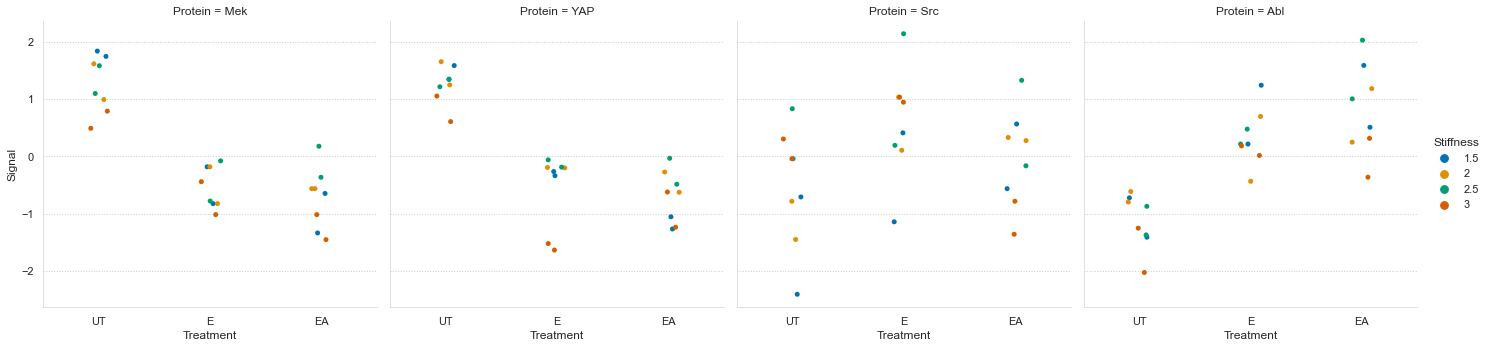

In [65]:
sns.catplot(data=dD, x="Treatment", y="Signal", hue="Stiffness", col="Protein")

In [70]:
tr1C = tr1.copy().drop(["Erk", "Akt"], axis=1)
tr2C = tr2.copy().drop("AXL", axis=1)
trM = tr1C.copy()
for ii in range(trM.shape[0]):
    trM.iloc[ii, 1:] = pd.Series(np.mean([tr1C.iloc[ii, 1:], tr2C.iloc[ii, 1:]], axis=0))

In [71]:
trM.insert(1, "Erk", tr1["Erk"].values)
trM.insert(1, "Akt", tr1["Akt"].values)
trM.insert(1, "AXL", tr2["AXL"].values)

In [72]:
d = preprocess_gels(trM)

No handles with labels found to put in legend.


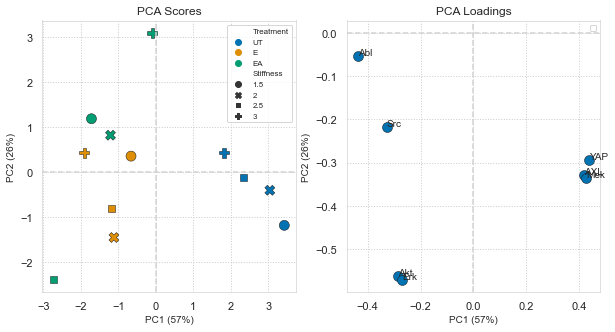

In [73]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))

plotPCA(ax, d, 2, ["Treatment", "Stiffness"], d.columns[2:], hue_scores="Treatment", style_scores="Stiffness", legendOut=False, quadrants=True)
# plt.savefig("gels.png", dpi=300)